   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  
<class 'pandas.core.

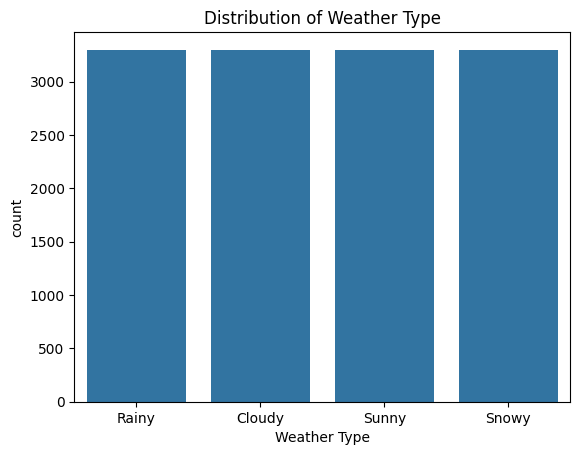


Distribution of Weather Type:
 Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, CategoricalNB, MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Data_set/ML project/weather_classification_data.csv')

# Display the first few rows
print(df.head())

# Get information about the dataframe
print("\nDataFrame info:\n", df.info())

# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Countplot of the target variable
sns.countplot(x="Weather Type",data=df)
plt.title('Distribution of Weather Type')
plt.show()
print("\nDistribution of Weather Type:\n", df['Weather Type'].value_counts())

Data preprocessing


Descriptive Statistics:
         Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.000

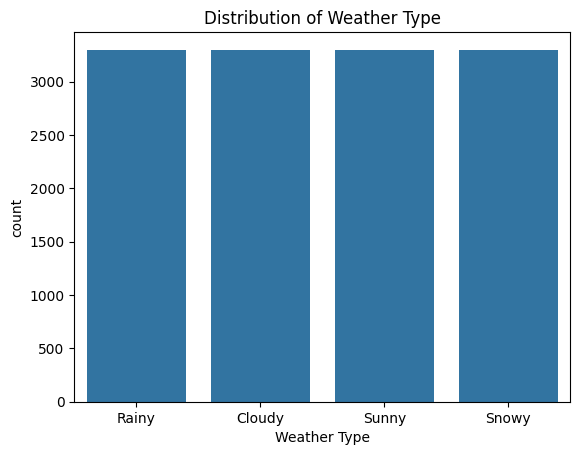


Distribution of Weather Type:
 Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64
Numerical columns after binning:
    Temperature  Humidity  Wind Speed  Precipitation (%)  Atmospheric Pressure  \
0          1.0       2.0         0.0                3.0                   2.0   
1          2.0       4.0         0.0                3.0                   2.0   
2          2.0       2.0         0.0                0.0                   2.0   
3          2.0       3.0         0.0                3.0                   2.0   
4          1.0       3.0         1.0                3.0                   2.0   

   UV Index  Visibility (km)  
0       0.0              0.0  
1       2.0              2.0  
2       1.0              1.0  
3       2.0              0.0  
4       0.0              0.0  

Features (X):
    Cloud Cover_clear  Cloud Cover_cloudy  Cloud Cover_overcast  \
0                0.0                 0.0                   0.0   
1             

In [ ]:
# Descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Countplot of the target variable
sns.countplot(x="Weather Type",data=df)
plt.title('Distribution of Weather Type')
plt.show()
print("\nDistribution of Weather Type:\n", df['Weather Type'].value_counts())

    # Binning numerical features
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
enc = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform',subsample=None)
df[numerical_features] = enc.fit_transform(df[numerical_features])
print("Numerical columns after binning:\n",df[numerical_features].head())

# One-hot encoding for categorical features
categorical_features = ['Cloud Cover', 'Season', 'Location']
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
encoded_cat_features=encoder.fit_transform(df[categorical_features])
encoded_cat_features_names = encoder.get_feature_names_out(categorical_features)

# Add the encoded features to df
df_encoded_cat_features = pd.DataFrame(encoded_cat_features, columns = encoded_cat_features_names)
df=pd.concat([df, df_encoded_cat_features], axis = 1)

#Create the features and target variables
X = df.drop(columns = ['Weather Type']+ numerical_features + categorical_features)
y = df['Weather Type']
print("\nFeatures (X):\n", X.head())
print("\nTarget variable (y):\n", y.head())

In [ ]:
  #Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (10560, 11)
Shape of X_test: (2640, 11)
Shape of y_train: (10560,)
Shape of y_test: (2640,)


In [ ]:
#Categorical Naive Bayes
categorical_naive_bayes_model = CategoricalNB()
categorical_naive_bayes_model.fit(X_train, y_train)

 #Multinomial Naive Bayes
multinomial_naive_bayes_model = MultinomialNB()
multinomial_naive_bayes_model.fit(X_train, y_train)

#Gaussian Naive Bayes
#transform and scale numerical data
from sklearn.preprocessing import PowerTransformer, StandardScaler
X_numerical_train = df[numerical_features].iloc[X_train.index]
X_numerical_test = df[numerical_features].iloc[X_test.index]
pt = PowerTransformer()
X_numerical_train = pt.fit_transform(X_numerical_train)
X_numerical_test = pt.transform(X_numerical_test)

scaler = StandardScaler()
X_numerical_train = scaler.fit_transform(X_numerical_train)
X_numerical_test = scaler.transform(X_numerical_test)
gaussian_naive_bayes_model = GaussianNB()
gaussian_naive_bayes_model.fit(X_numerical_train, y_train)

GaussianNB()

In [ ]:
  # Make predictions
y_pred_cat = categorical_naive_bayes_model.predict(X_test)
y_pred_mul = multinomial_naive_bayes_model.predict(X_test)
y_pred_gau = gaussian_naive_bayes_model.predict(X_numerical_test)

 # Calculate accuracy
accuracy_cat = accuracy_score(y_test, y_pred_cat)
accuracy_mul = accuracy_score(y_test, y_pred_mul)
accuracy_gau = accuracy_score(y_test, y_pred_gau)

# Print accuracy
print("\nCategorical Naive Bayes Accuracy:", accuracy_cat)
print("Multinomial Naive Bayes Accuracy:", accuracy_mul)
print("Gaussian Naive Bayes Accuracy:", accuracy_gau)

# Classification report
print("\nCategorical Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_cat))
print("Multinomial Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_mul))
print("Gaussian Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_gau))


# Confusion Matrix
print("\nCategorical Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_cat))
print("\nMultinomial Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mul))
print("\nGaussian Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gau))


Categorical Naive Bayes Accuracy: 0.6723484848484849
Multinomial Naive Bayes Accuracy: 0.671969696969697
Gaussian Naive Bayes Accuracy: 0.7696969696969697

Categorical Naive Bayes Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.49      0.49      0.49       651
       Rainy       0.59      0.58      0.58       647
       Snowy       0.72      0.94      0.82       701
       Sunny       0.96      0.66      0.78       641

    accuracy                           0.67      2640
   macro avg       0.69      0.67      0.67      2640
weighted avg       0.69      0.67      0.67      2640

Multinomial Naive Bayes Classification Report:
               precision    recall  f1-score   support

      Cloudy       0.49      0.48      0.49       651
       Rainy       0.58      0.58      0.58       647
       Snowy       0.72      0.94      0.82       701
       Sunny       0.96      0.66      0.78       641

    accuracy                           0


Categorical Naive Bayes Cross-Validation Scores: [0.6655303  0.6530303  0.66363636 0.65643939 0.64848485]
Multinomial Naive Bayes Cross-Validation Scores: [0.6655303  0.6530303  0.66363636 0.65757576 0.64810606]
Gaussian Naive Bayes Cross-Validation Scores: [0.77045455 0.7905303  0.76666667 0.7719697  0.75795455]

Categorical Naive Bayes Mean CV Accuracy: 0.6574242424242425
Multinomial Naive Bayes Mean CV Accuracy: 0.6575757575757576
Gaussian Naive Bayes Mean CV Accuracy: 0.7715151515151515


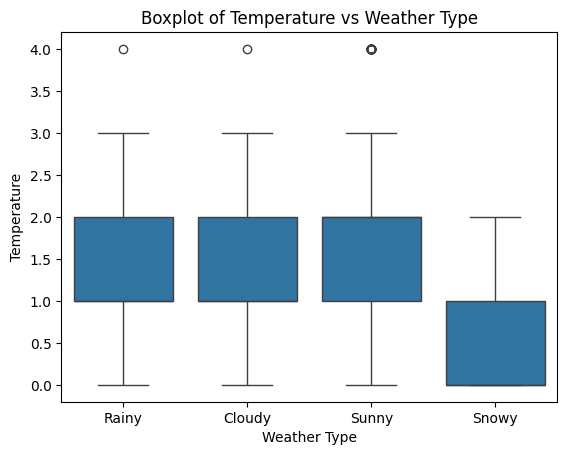

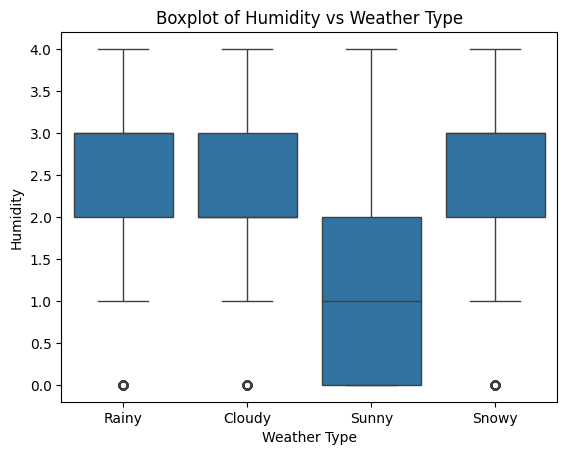

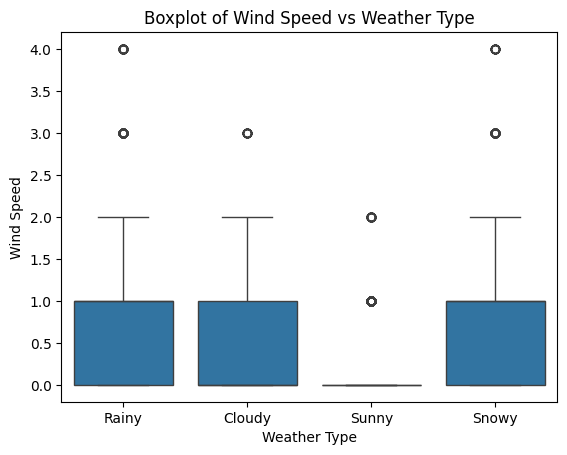

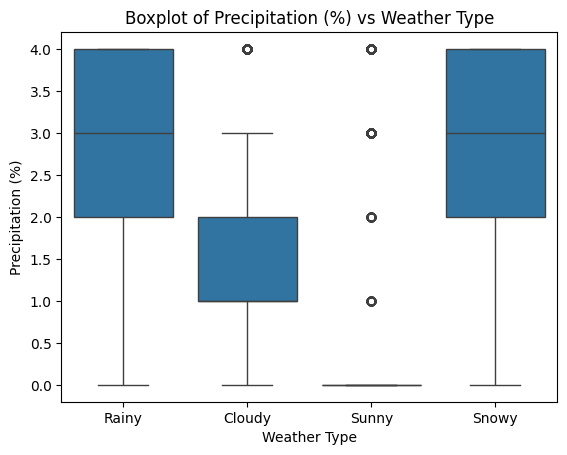

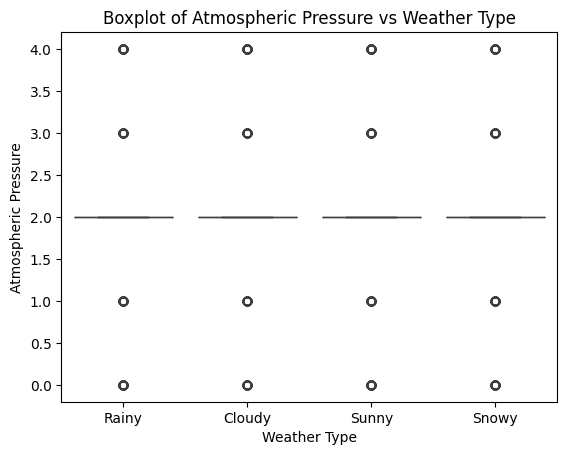

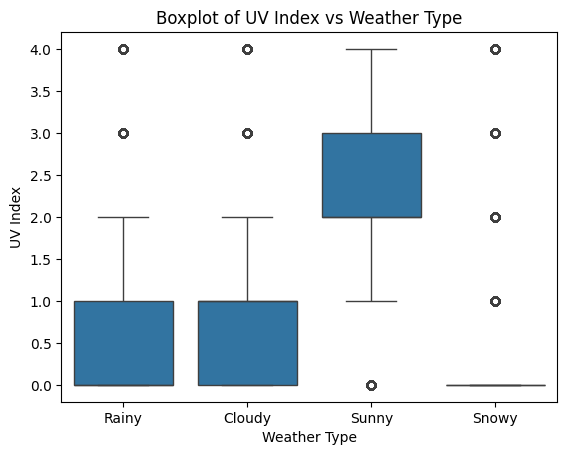

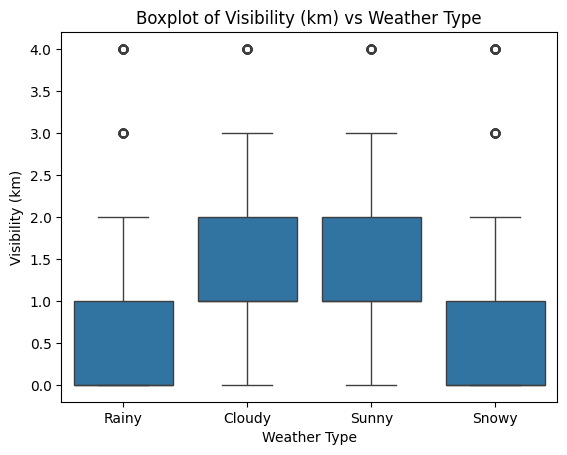


Feature log probabilities by class:

Class: Cloudy
                      feature  probability
3   Cloud Cover_partly cloudy     0.191380
2        Cloud Cover_overcast     0.132445
8            Location_coastal     0.113471
9             Location_inland     0.110706
10          Location_mountain     0.109073
7               Season_Winter     0.090475
5               Season_Spring     0.085072
4               Season_Autumn     0.081427
6               Season_Summer     0.076401
1          Cloud Cover_cloudy     0.009424
0           Cloud Cover_clear     0.000126

Class: Rainy
                      feature  probability
2        Cloud Cover_overcast     0.220201
8            Location_coastal     0.124467
9             Location_inland     0.106399
3   Cloud Cover_partly cloudy     0.102635
10          Location_mountain     0.102384
7               Season_Winter     0.087453
5               Season_Spring     0.083438
6               Season_Summer     0.082936
4               Season_Autumn  

In [ ]:
#Cross-validation
scores_cat = cross_val_score(categorical_naive_bayes_model, X, y, cv=5)
scores_mul = cross_val_score(multinomial_naive_bayes_model, X, y, cv=5)
X_numerical= df[numerical_features]
pt = PowerTransformer()
X_numerical = pt.fit_transform(X_numerical)
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X_numerical)
scores_gau = cross_val_score(gaussian_naive_bayes_model, X_numerical, y, cv=5)
print("\nCategorical Naive Bayes Cross-Validation Scores:", scores_cat)
print("Multinomial Naive Bayes Cross-Validation Scores:", scores_mul)
print("Gaussian Naive Bayes Cross-Validation Scores:", scores_gau)
print("\nCategorical Naive Bayes Mean CV Accuracy:", scores_cat.mean())
print("Multinomial Naive Bayes Mean CV Accuracy:", scores_mul.mean())
print("Gaussian Naive Bayes Mean CV Accuracy:", scores_gau.mean())

#7.  Visualization
# Plot box plots
for col in numerical_features:
  sns.boxplot(x='Weather Type', y = col, data = df)
  plt.title(f'Boxplot of {col} vs Weather Type')
  plt.show()

#8. Feature Importance

feature_log_probabilities = multinomial_naive_bayes_model.feature_log_prob_
class_names = multinomial_naive_bayes_model.classes_
num_features = len(X.columns)

print("\nFeature log probabilities by class:")
for i, class_name in enumerate(class_names):
      print(f"\nClass: {class_name}")
      feature_probs = np.exp(feature_log_probabilities[i])
      feature_importance = pd.DataFrame({'feature': X.columns, 'probability': feature_probs})
      feature_importance = feature_importance.sort_values(by = 'probability', ascending = False)
      print(feature_importance)